# Data preprocessing

https://drive.google.com/drive/folders/17igjX7m0BHf8zhomv0TcexuQw0J4xqiF?usp=sharing - dataset. The data was collected from two phones. The first one was in the arm, the second one was in the pocket. At the beginning of the measurements, a jump was made. 16 steps were made.

In [1]:
import numpy as np
import pandas as pd

A1 = pd.read_csv('Data_from_phones/Ac1.csv')
A2 = pd.read_csv('Data_from_phones/Ac2.csv')
G1 = pd.read_csv('Data_from_phones/Gyro1.csv')
G2 = pd.read_csv('Data_from_phones/Gyro2.csv')
# to make the timeline starts from zero
G1.time = G1.time - G1.time.iloc[0]
G2.time = G2.time - G2.time.iloc[0]

In [2]:
# A1.time is not a time, it is the measurement number
A1.time = A1.time/15

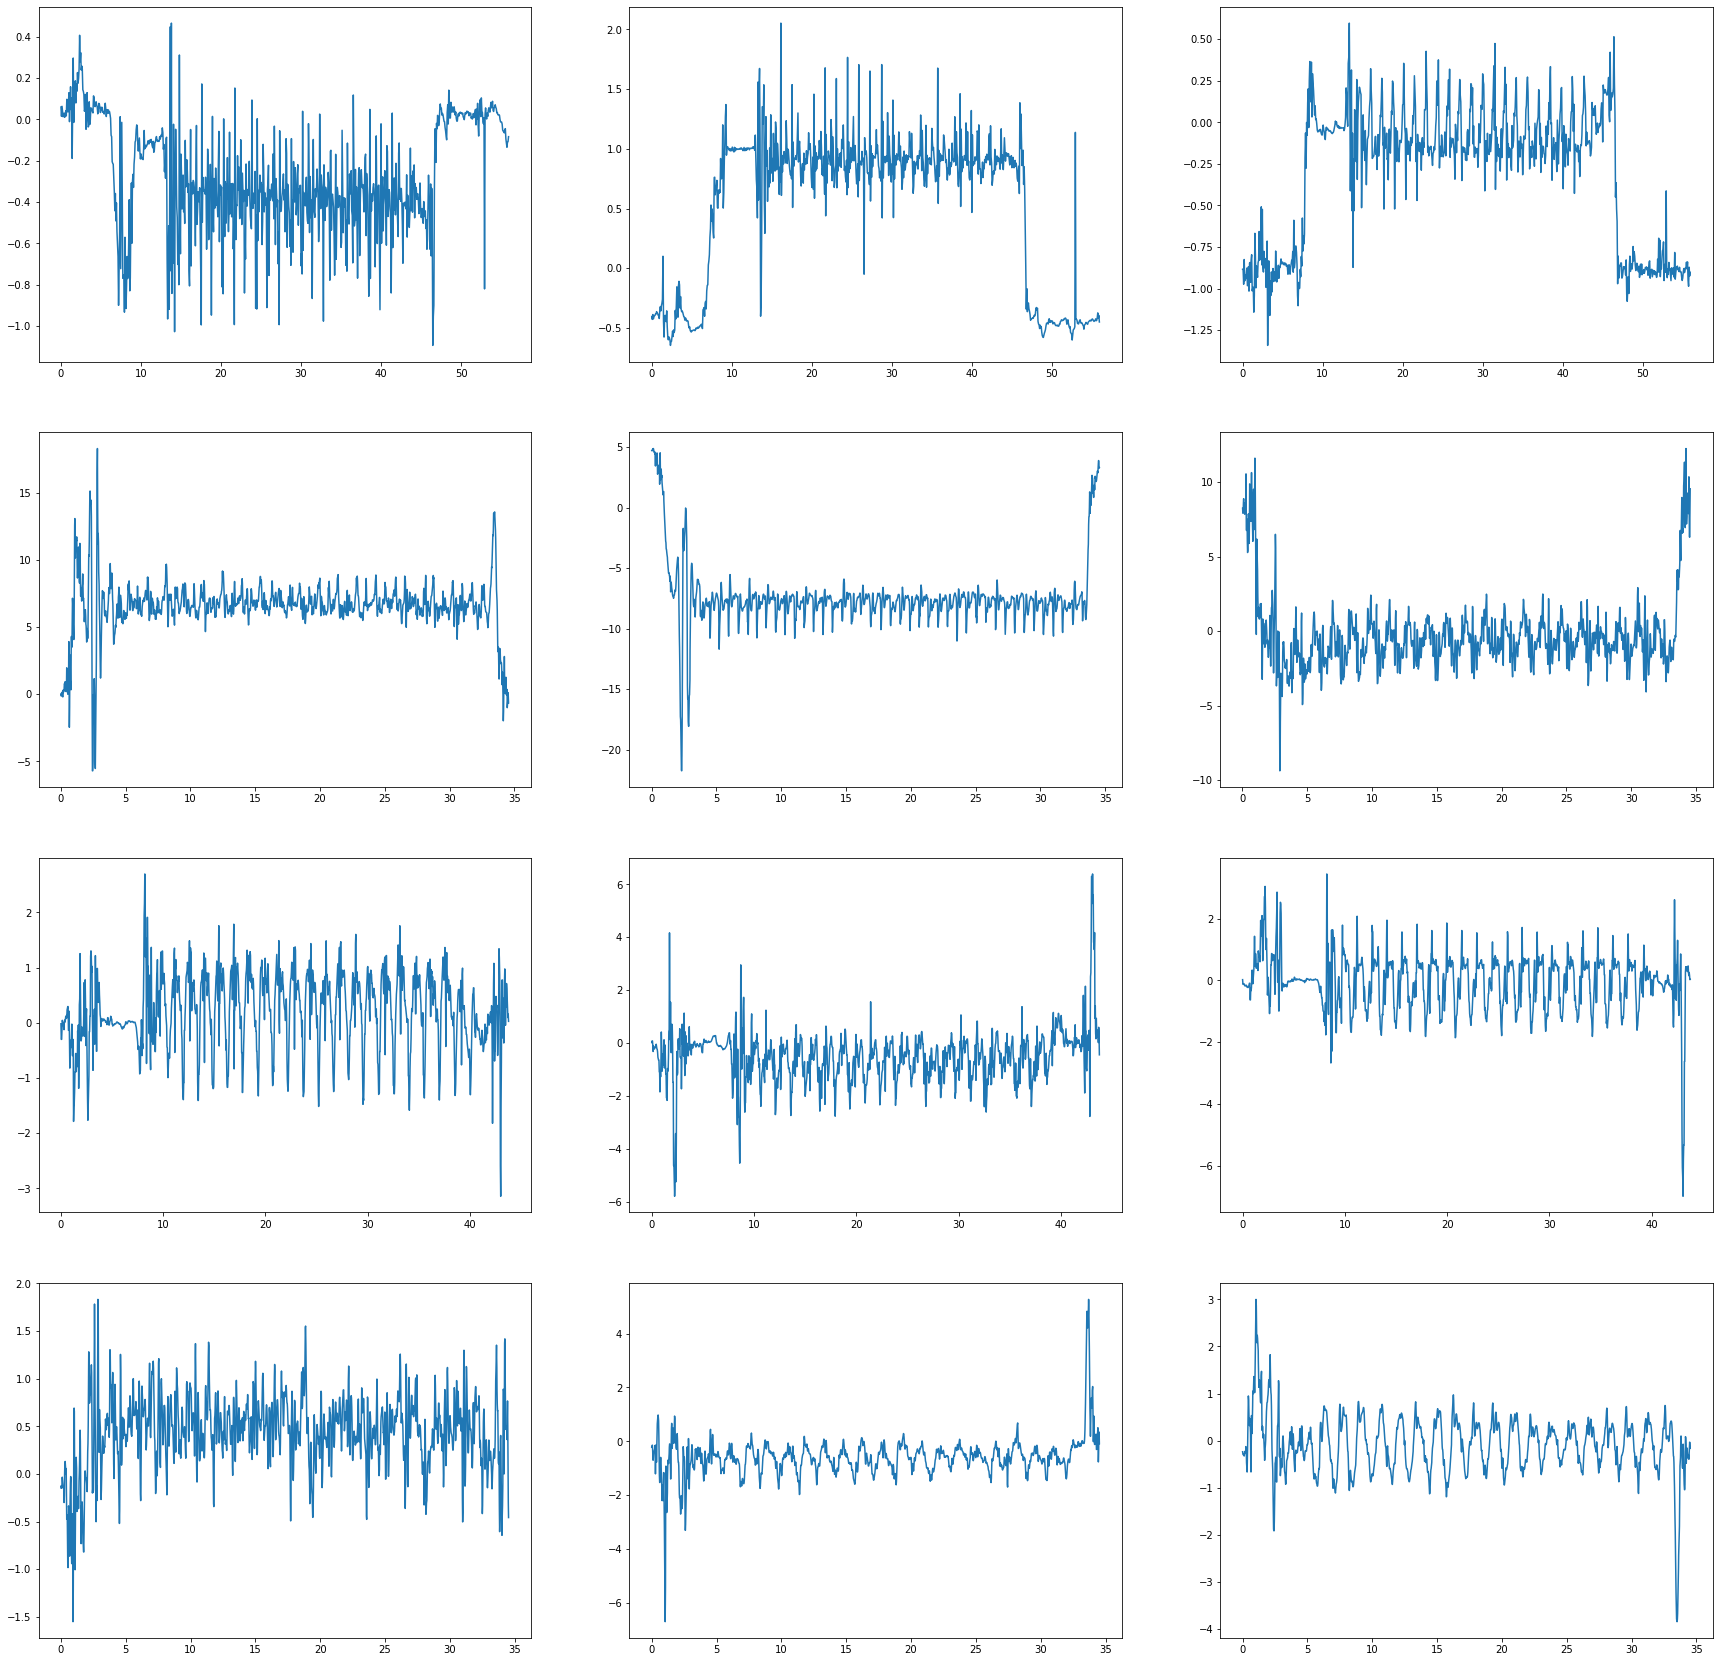

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(4,3,figsize = (30,30))
for i,a in [[0,'x'],[1,'y'],[2,'z']]:
    ax[0,i].plot(A1.time,A1[a])
    ax[1,i].plot(A2.time,A2[a])
    ax[2,i].plot(G1.time,G1[a])
    ax[3,i].plot(G2.time,G2[a])

In [4]:
A1.shape, G1.shape

((840, 4), (1314, 4))

In [5]:
#A1 = A1.iloc[A1[A1.x == A1.x.min()].index[0]:]
#A2 = A2.iloc[A2[A2.x == A2.x.min()].index[0]:]
#G1 = G1.iloc[G1[G1.y == G1.y.min()].index[0]:]
#G2 = G2.iloc[G2[G2.y == G2.y.min()].index[0]:]

G1 = G1.iloc[G1[G1.z == G1.iloc[:500,3].min()].index[0]+1:]
A1 = A1.iloc[A1[A1.x == A1.iloc[:500,1].min()].index[0]:]
G2 = G2.iloc[A2[A2.x == A2.x.max()].index[0]:]
A2 = A2.iloc[A2[A2.x == A2.x.max()].index[0]:]

A1.time = A1.time - A1.time.iloc[0]
A2.time = A2.time - A2.time.iloc[0]
G1.time = G1.time - G1.time.iloc[0]
G2.time = G2.time - G2.time.iloc[0]

In [6]:
f_A1 = 50/(A1.iloc[50,0] - A1.iloc[0,0])
f_A2 = 50/(A2.iloc[50,0] - A2.iloc[0,0])
f_G1 = 50/(G1.iloc[50,0] - G1.iloc[0,0])
f_G2 = 50/(G2.iloc[50,0] - G2.iloc[0,0])
A1.index = range(A1.shape[0])
A2.index = range(A2.shape[0])
G1.index = range(G1.shape[0])
G2.index = range(G2.shape[0])

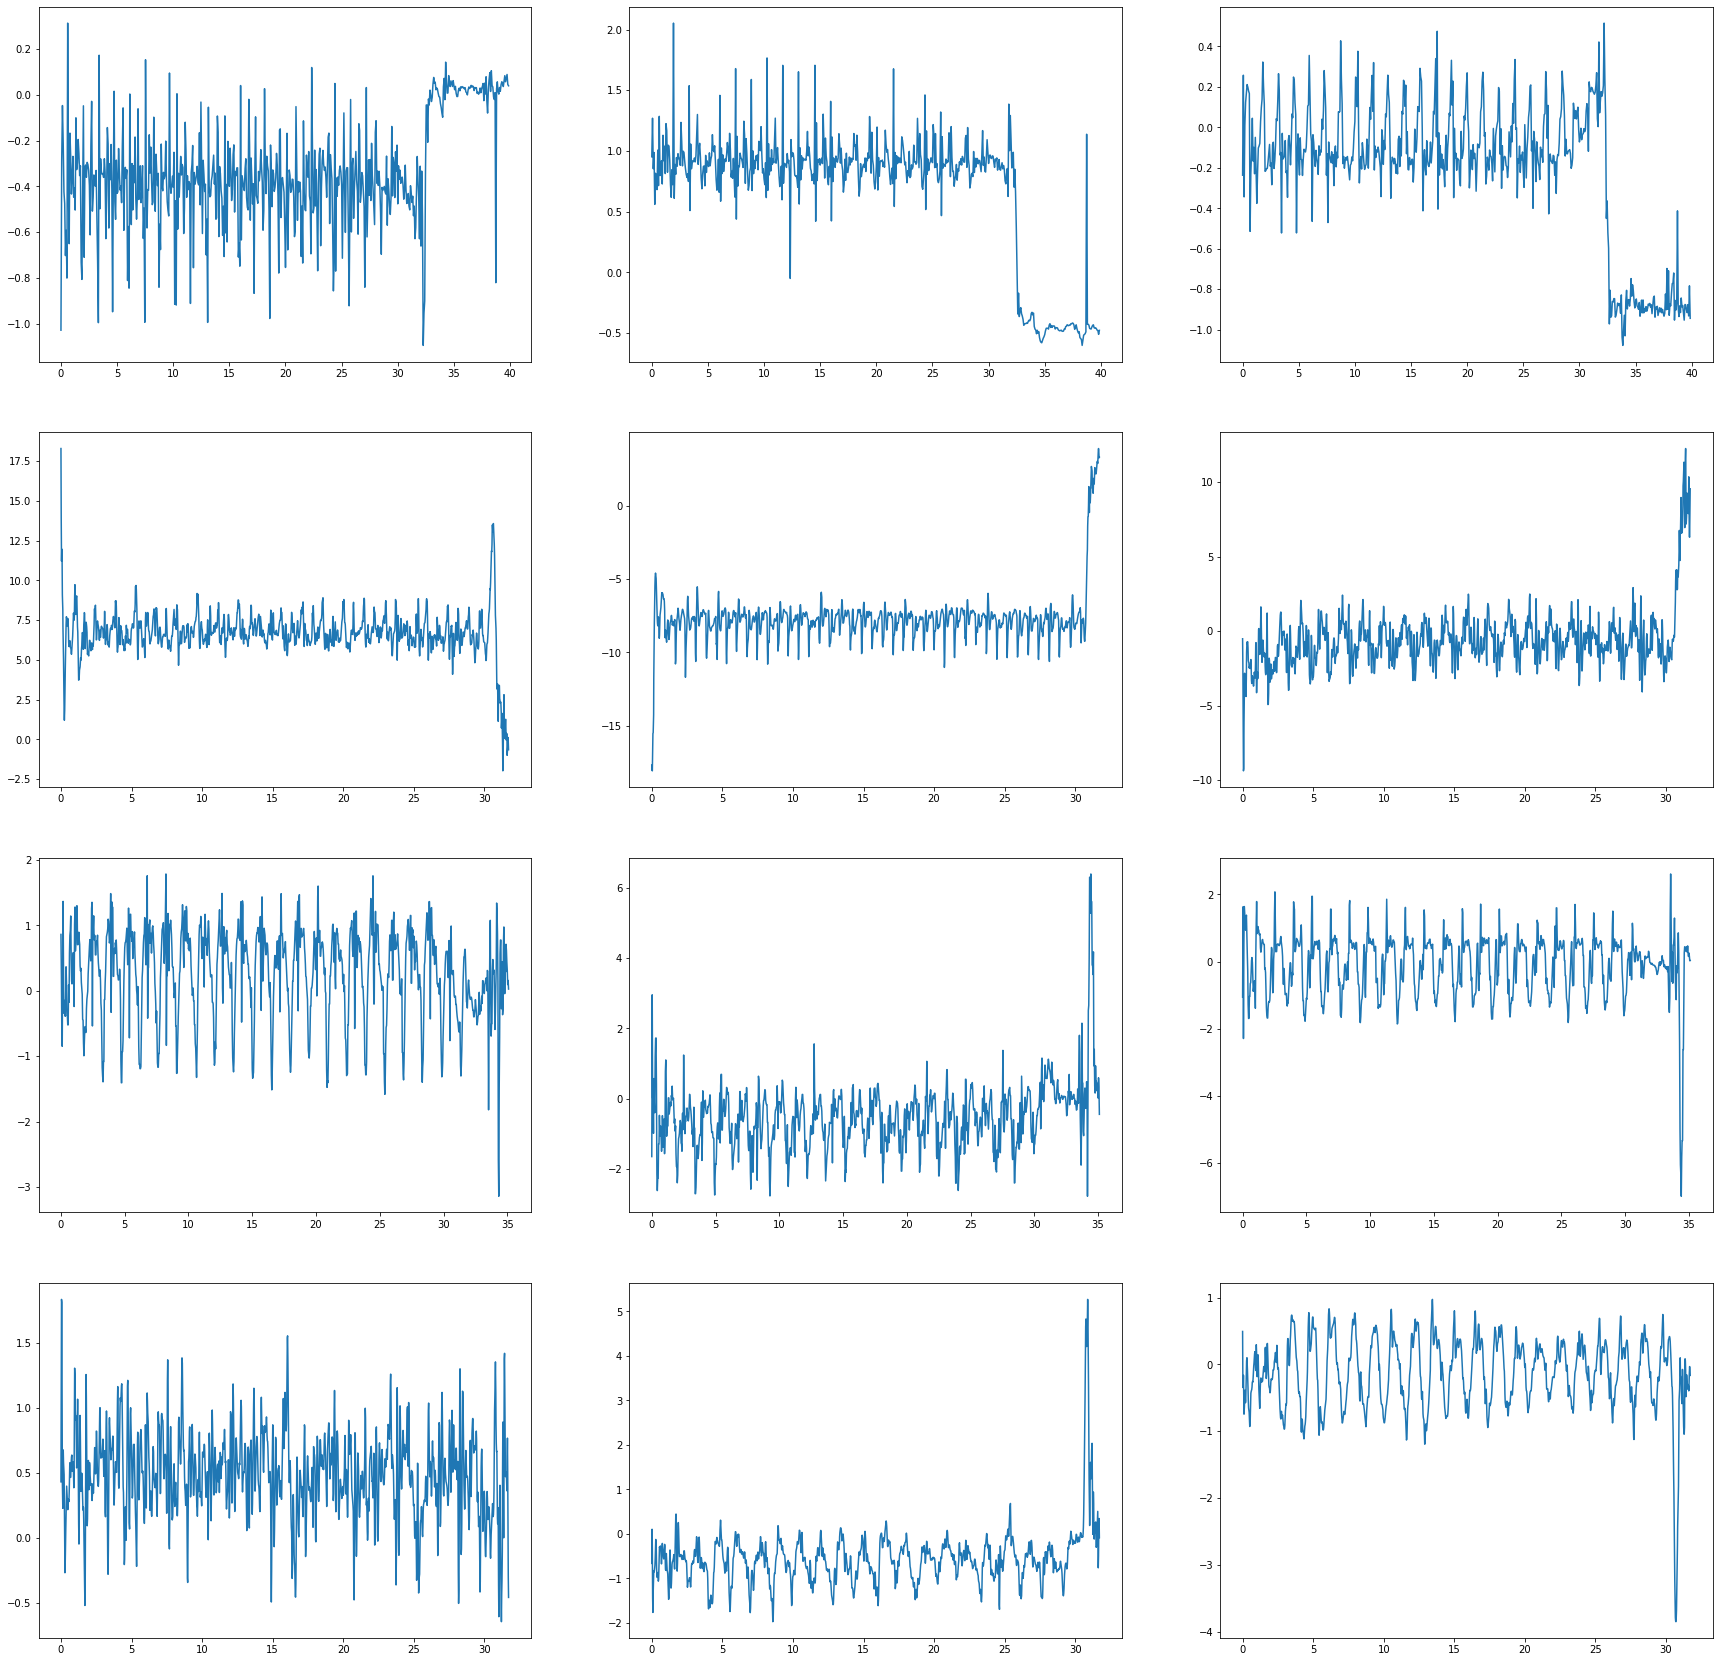

In [7]:
fig,ax = plt.subplots(4,3,figsize = (30,30))
for i,a in [[0,'x'],[1,'y'],[2,'z']]:
    ax[0,i].plot(A1.iloc[:int(40*f_A1),0],A1.iloc[:int(40*f_A1),i+1])
    ax[1,i].plot(A2.iloc[:int(40*f_A2),0],A2.iloc[:int(40*f_A2),i+1])
    ax[2,i].plot(G1.time,G1[a])
    ax[3,i].plot(G2.time,G2[a])

In [8]:
G1 = G1.iloc[G1[G1.y == G1.iloc[:20,2].min()].index[0]:]
G1.time = G1.time - G1.time.iloc[0]
G1.index = range(G1.shape[0])

In [9]:
A1 = A1.iloc[A1[A1.z == A1.iloc[:30,3].min()].index[0]:]
A1.time = A1.time - A1.time.iloc[0]
A1.index = range(A1.shape[0])

In [10]:
A2 = A2.iloc[G2[G2.x == G2.iloc[:100,1].min()].index[0]:]
G2 = G2.iloc[G2[G2.x == G2.iloc[:100,1].min()].index[0]:]
G2 = G2.iloc[A2[A2.y == A2.iloc[:100,2].min()].index[0]+1:]
A2 = A2.iloc[A2[A2.y == A2.iloc[:100,2].min()].index[0]+1:]
A2.time = A2.time - A2.time.iloc[0]
A2.index = range(A2.shape[0])
G2.time = G2.time - G2.time.iloc[0]
G2.index = range(G2.shape[0])

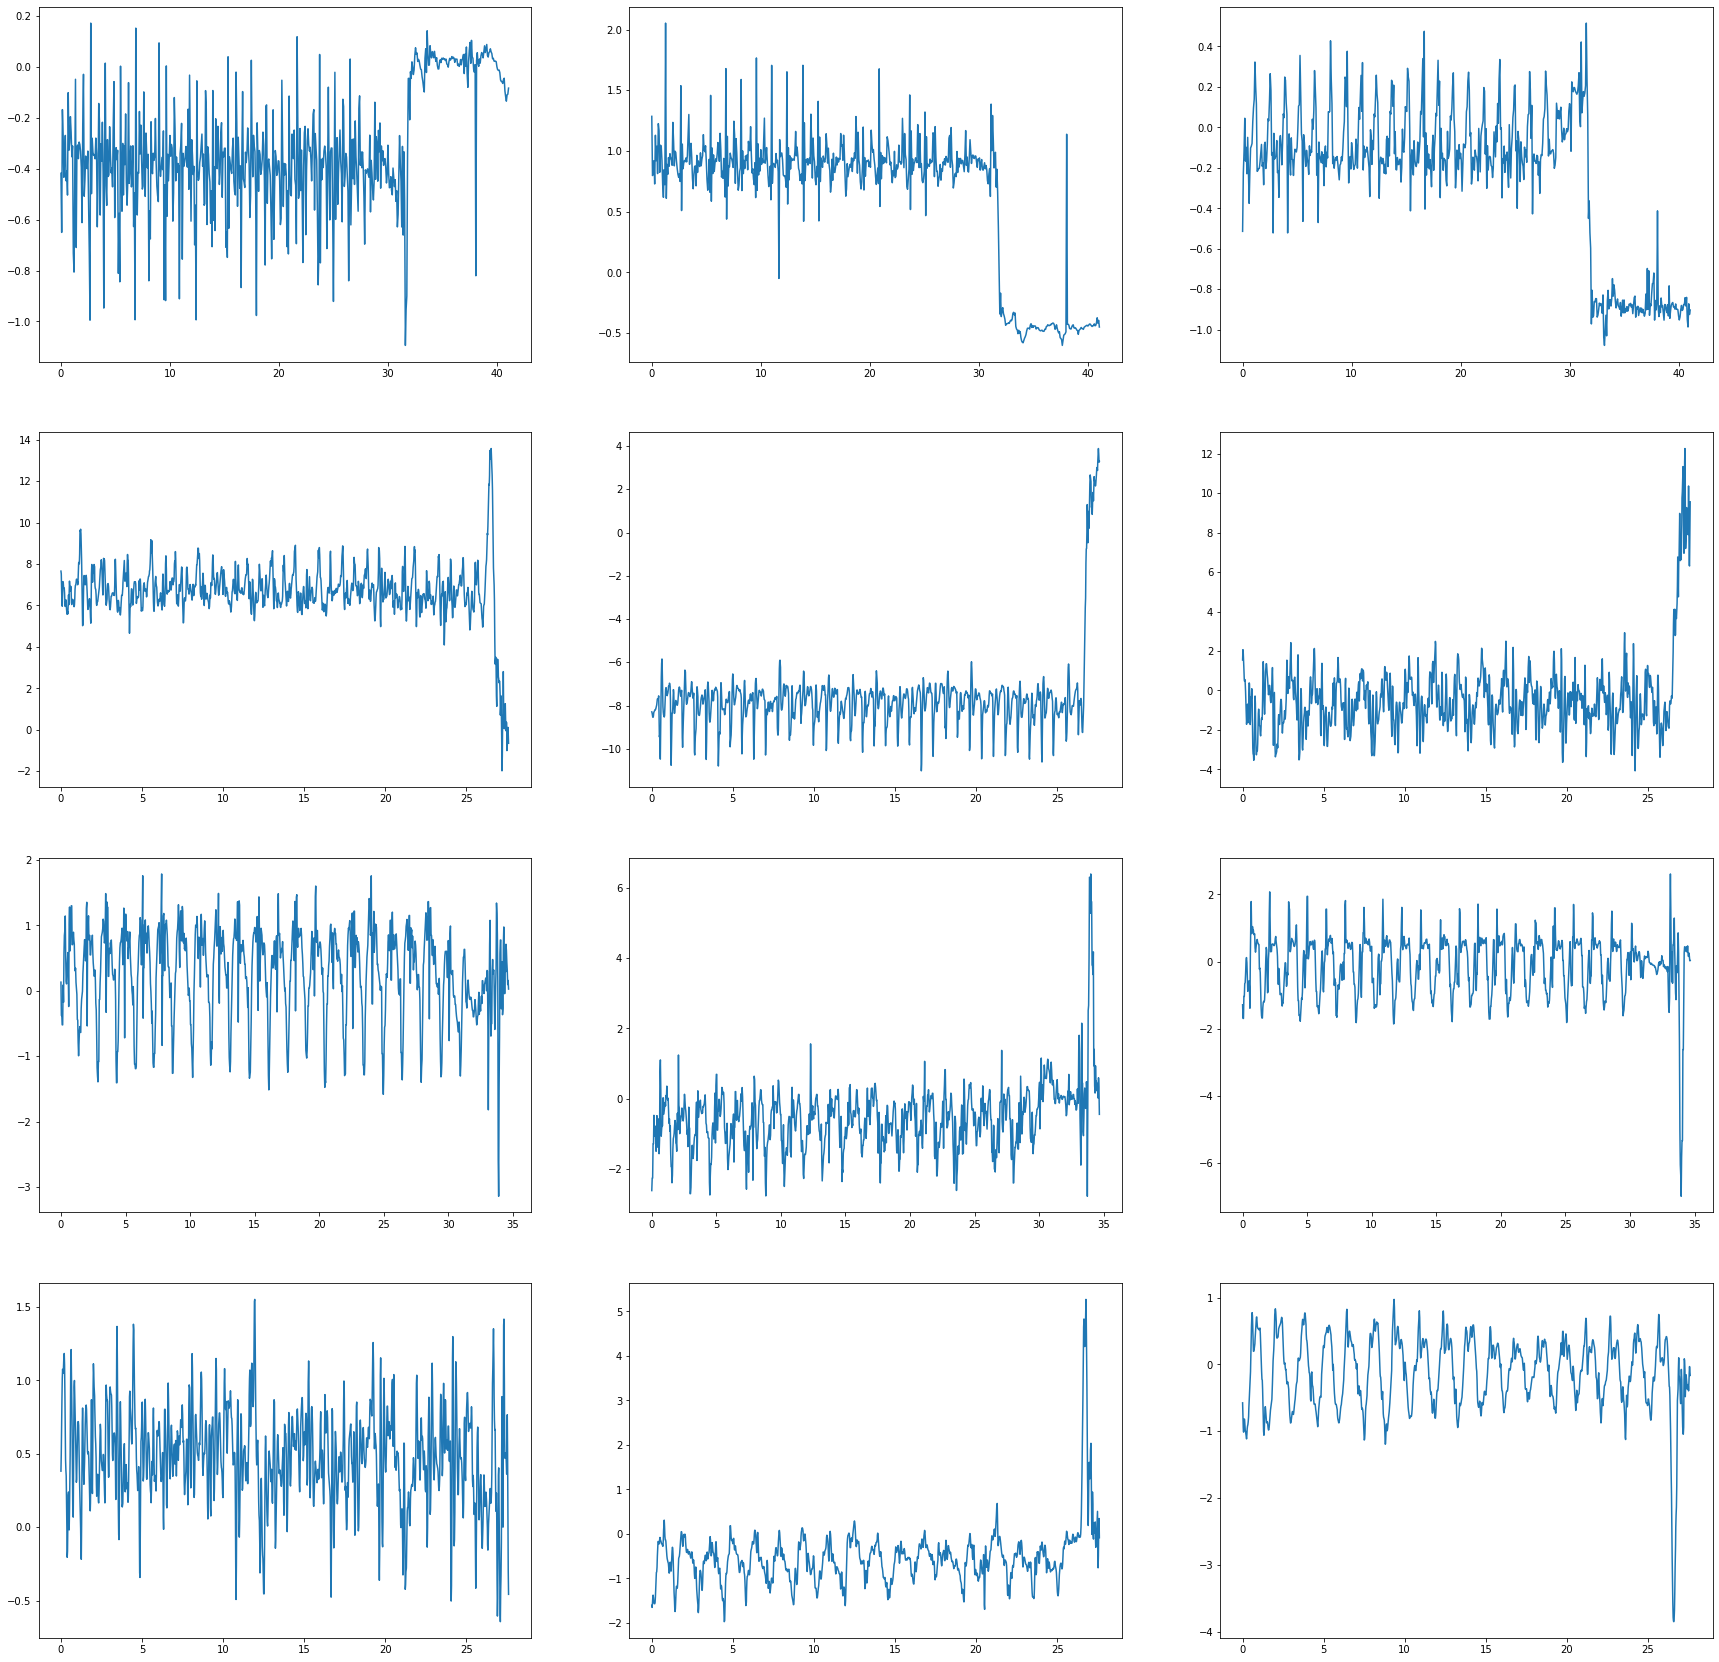

In [11]:
fig,ax = plt.subplots(4,3,figsize = (30,30))
for i,a in [[0,'x'],[1,'y'],[2,'z']]:
    ax[0,i].plot(A1.time,A1[a])
    ax[1,i].plot(A2.time,A2[a])
    ax[2,i].plot(G1.time,G1[a])
    ax[3,i].plot(G2.time,G2[a])
    #ax[0,i].set_xlim(35,42)
    #ax[1,i].set_xlim(35,42)
    #ax[2,i].set_xlim(35,42)
    #ax[3,i].set_xlim(35,42)

In [12]:
#time_start = G2[G2.y == G2.iloc[20:,2].min()].iloc[0,0] + 10
#time_end = A2[A2.x == A2.iloc[10:int(40*f_A2),1].min()].iloc[0,0] - 3
time_start = 2
time_end = 25

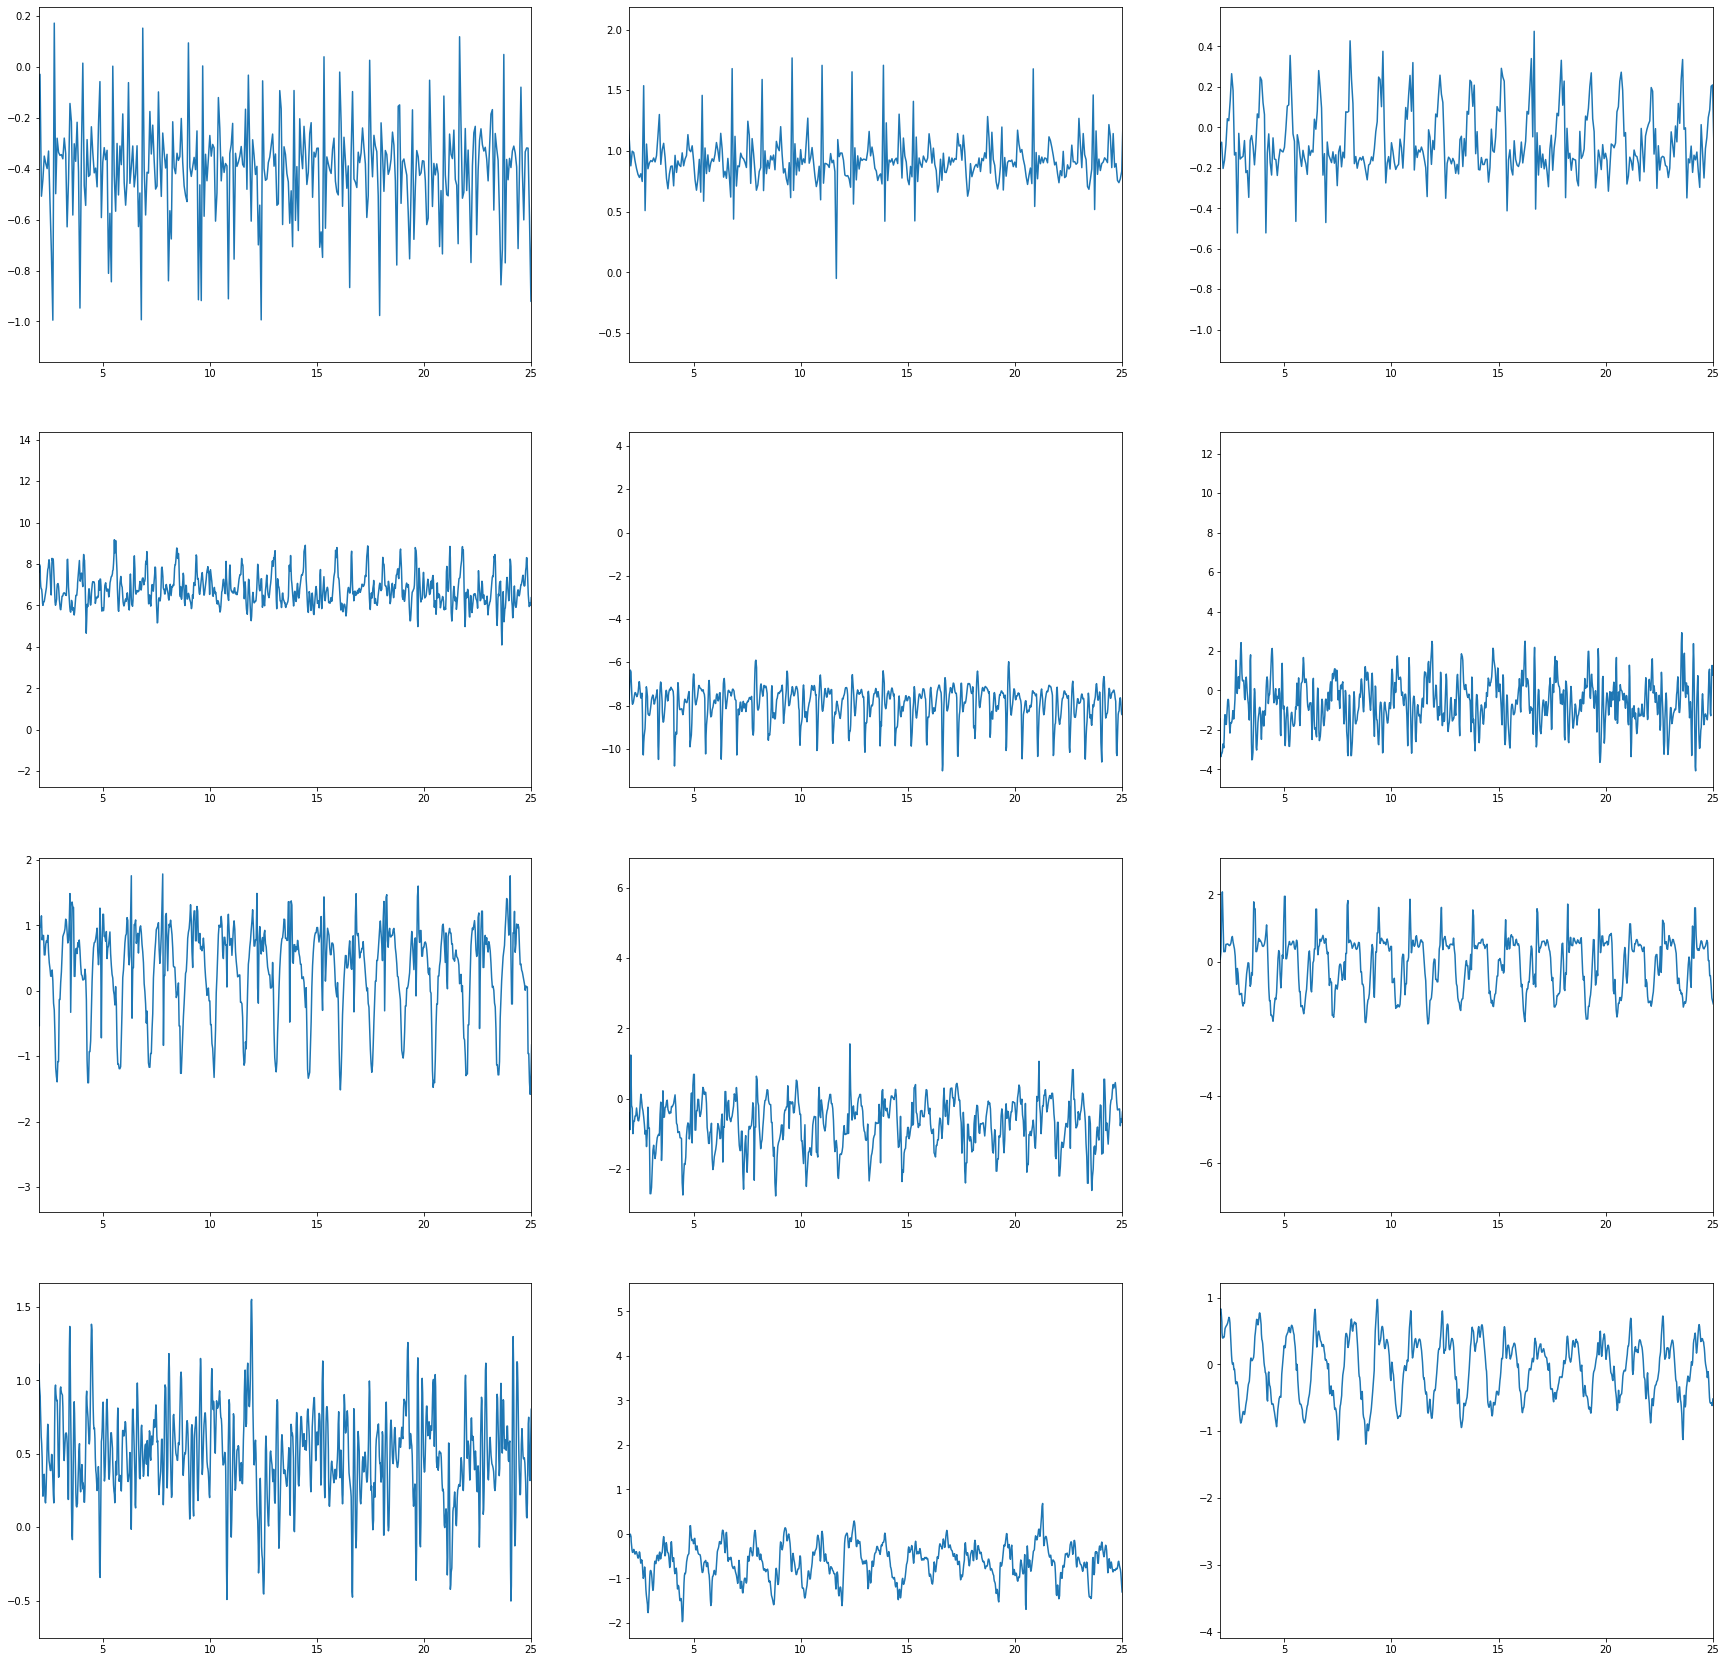

In [13]:
fig,ax = plt.subplots(4,3,figsize = (30,30))
for i,a in [[0,'x'],[1,'y'],[2,'z']]:
    ax[0,i].plot(A1.time,A1[a])
    ax[1,i].plot(A2.time,A2[a])
    ax[2,i].plot(G1.time,G1[a])
    ax[3,i].plot(G2.time,G2[a])
    ax[0,i].set_xlim(time_start,time_end)
    ax[1,i].set_xlim(time_start,time_end)
    ax[2,i].set_xlim(time_start,time_end)
    ax[3,i].set_xlim(time_start,time_end)

In [14]:
A1 = A1.iloc[:A1[A1.time > time_end].index[0]]
A2 = A2.iloc[:A2[A2.time > time_end].index[0]]
G1 = G1.iloc[:G1[G1.time > time_end].index[0]]
G2 = G2.iloc[:G2[G2.time > time_end].index[0]]
A1 = A1.iloc[A1[A1.time > time_start].index[0]:]
A2 = A2.iloc[A2[A2.time > time_start].index[0]:]
G1 = G1.iloc[G1[G1.time > time_start].index[0]:]
G2 = G2.iloc[G2[G2.time > time_start].index[0]:]

In [16]:
A1.shape

(345, 4)

In [41]:
def downsampling(data,sh_data,sh_new):
    if sh_data != sh_new:
        sh_ratio = sh_data/sh_new
        new_data = np.zeros((sh_new,data.shape[1]))
        for i in range(sh_new):
            new_data[i,0] = data[int(i*sh_ratio),0]
            new_data[i,1:] = data[int(i*sh_ratio):int((i+1)*sh_ratio),1:].mean(axis=0)
    else:
        new_data = data
    return new_data
# make arrays of data with equal shapes 
a2 = downsampling(np.array(A2),A2.shape[0],A1.shape[0])
g2 = downsampling(np.array(G2),G2.shape[0],A1.shape[0])
a1 = np.array(A1)
g1 = downsampling(np.array(G1),G1.shape[0],A1.shape[0])
print(a1.shape,a2.shape,g1.shape,g2.shape)

(345, 4) (345, 4) (345, 4) (345, 4)


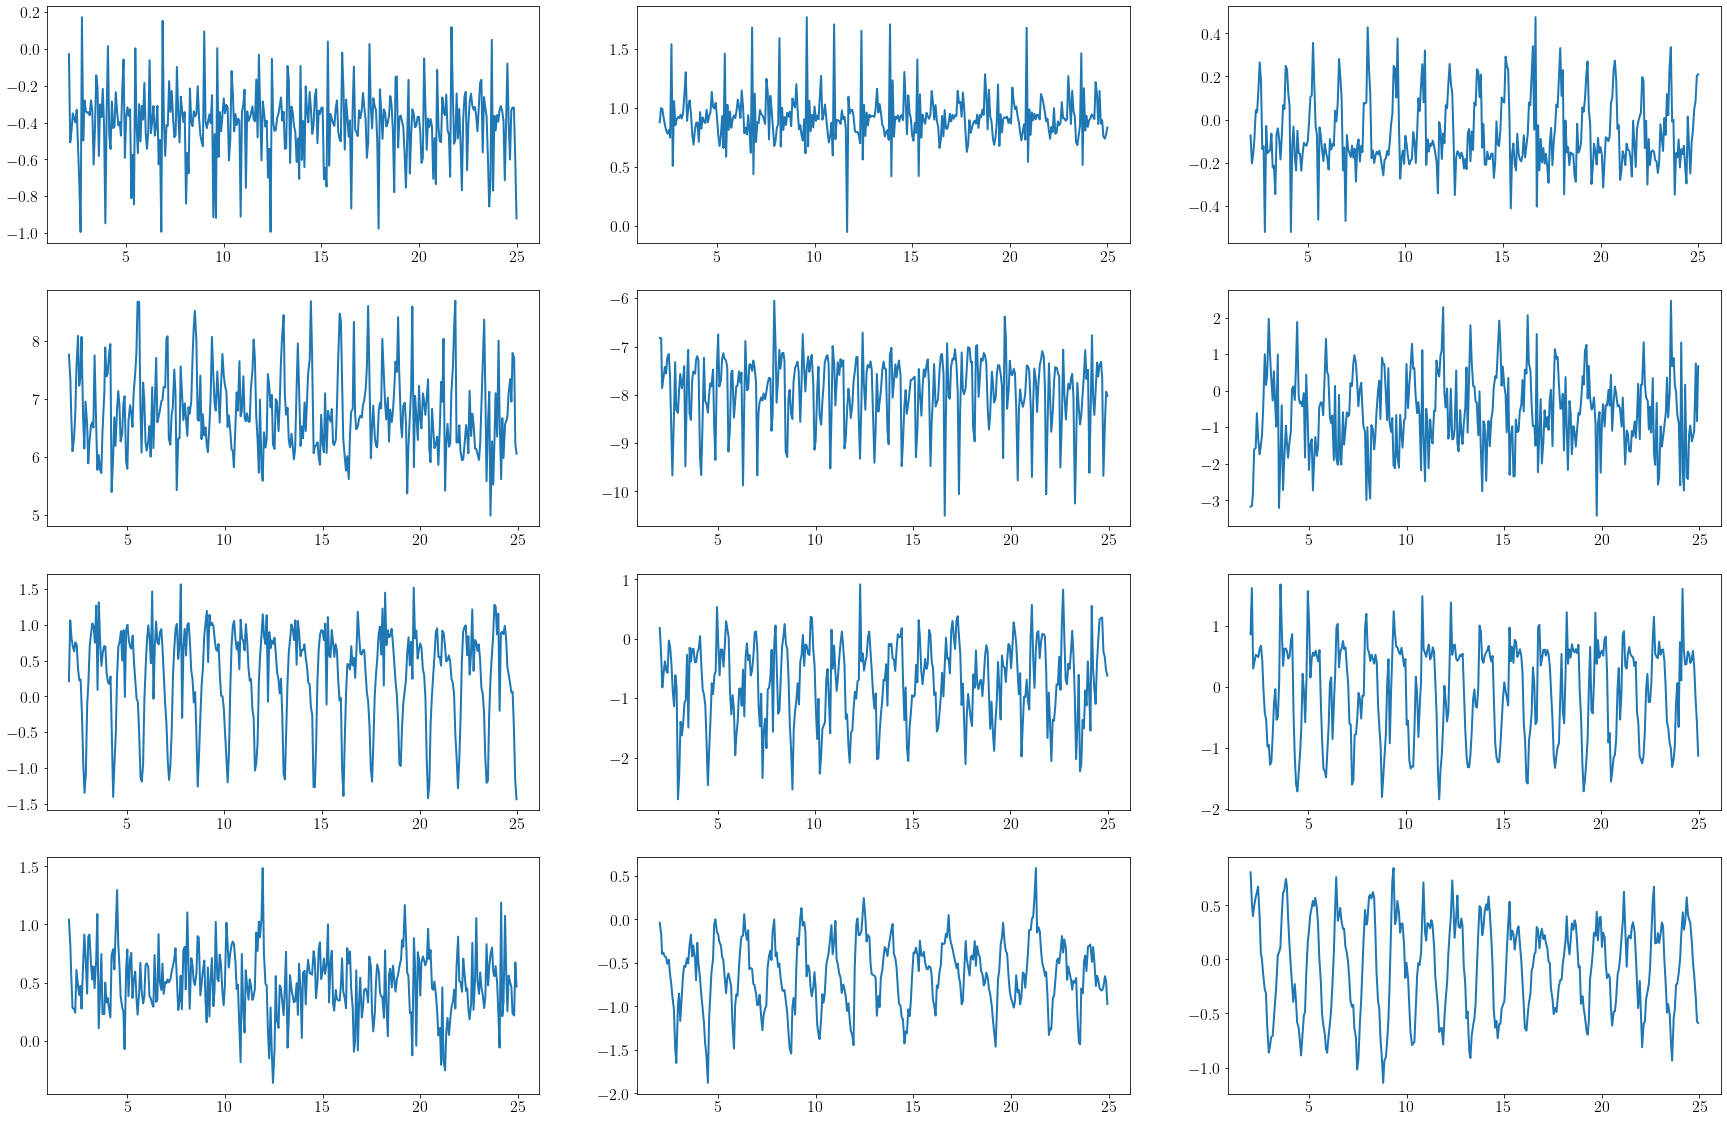

In [42]:
fig,ax = plt.subplots(4,3,figsize = (30,20))
for i,a in [[0,'x'],[1,'y'],[2,'z']]:
    ax[0,i].plot(a1[:,0],a1[:,i+1])
    ax[1,i].plot(a2[:,0],a2[:,i+1])
    ax[2,i].plot(g1[:,0],g1[:,i+1])
    ax[3,i].plot(g2[:,0],g2[:,i+1])

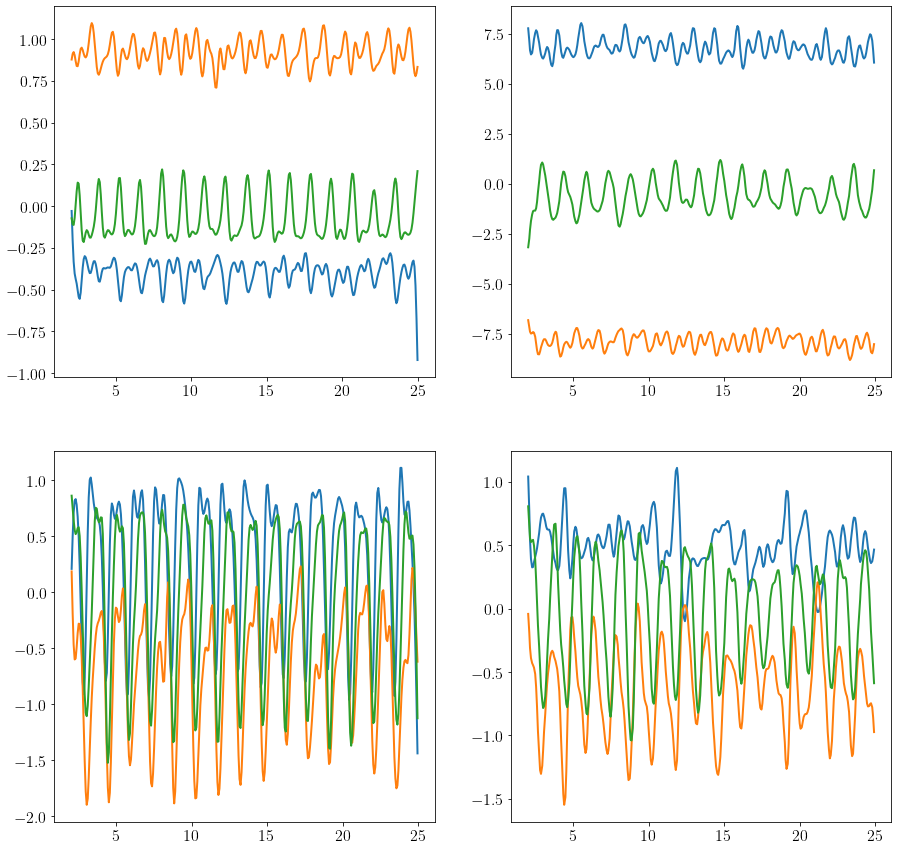

In [43]:
from scipy.signal import butter, sosfilt,filtfilt
def bandpass_filter(signal, lowcut, highcut, fs = 100, order=3):
        nyq =  fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order,  (low, high), btype='band',analog=False,output='sos')
        filtered_signal = np.array([sosfilt(sos, signal[:,i]) for i in range(signal.shape[1])])
        return filtered_signal.T
b, a = butter(3, 0.25, 'low')
a1_f = filtfilt(b, a, a1[:,1:],axis=0) 
a2_f = filtfilt(b, a, a2[:,1:],axis=0)
g1_f = filtfilt(b, a, g1[:,1:],axis=0)
g2_f = filtfilt(b, a, g2[:,1:],axis=0)
#a2_f = bandpass_filter(a2[:,1:],lowcut=0.2,highcut=50,fs = 100)
fig,ax = plt.subplots(2,2, figsize = (15,15))
ax[0,0].plot(a1[:,0],a1_f)
ax[0,1].plot(a2[:,0],a2_f)
ax[1,0].plot(g1[:,0],g1_f)
ax[1,1].plot(g2[:,0],g2_f)

In [44]:
import warnings
warnings.simplefilter('ignore')

plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [45]:
import plotly.graph_objects as go
x_acc = ( (g1_f[:,0])**2 + (g1_f[:,1])**2 + (g1_f[:,2])**2)**.5
_m = np.mean(x_acc)
x_acc -= _m
t = (g1[:,0]).astype(float).reshape([-1,])
t = np.linspace(0,t[-1]-t[0],len(x_acc))

fig = go.Figure()
fig.add_scatter(y = x_acc, mode='lines', name='Sum squares')
fig.show()

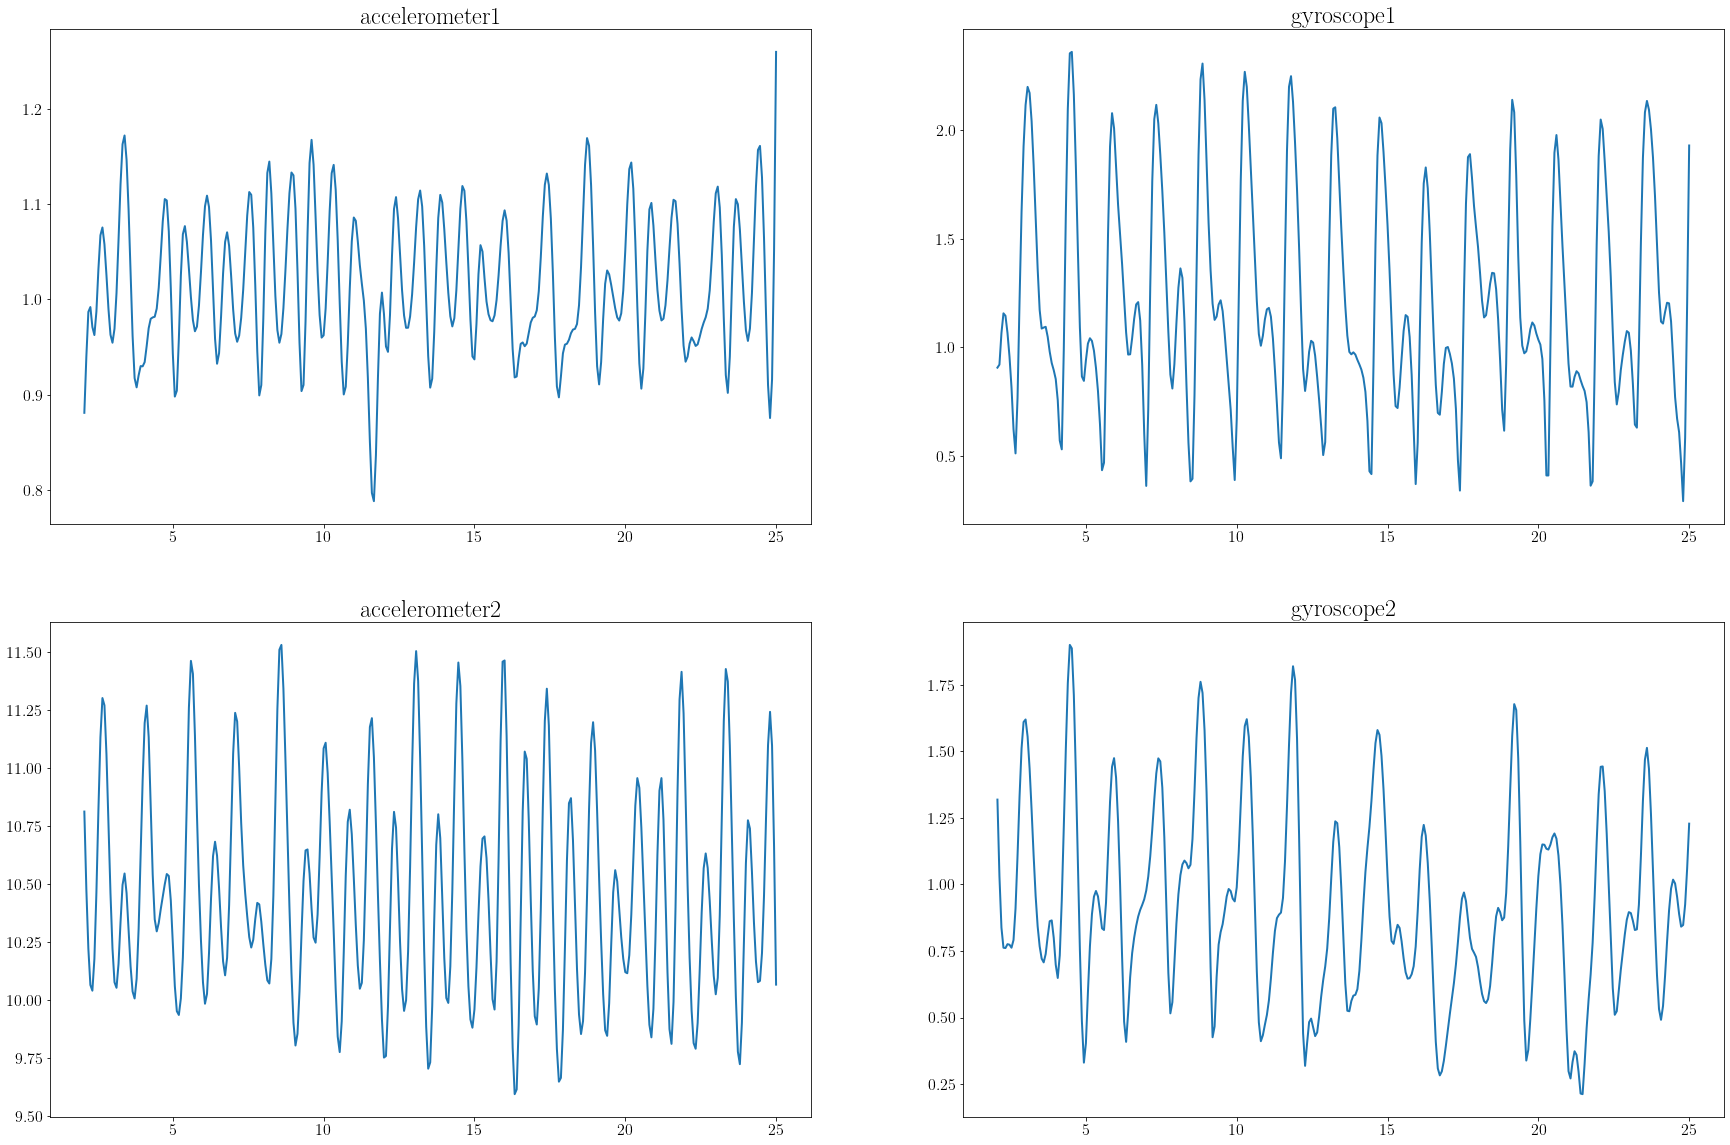

In [47]:
a1_acc = ( (a1_f[:,0])**2 + (a1_f[:,1])**2 + (a1_f[:,2])**2)**.5
a1_m = np.mean(a1_acc)
g1_acc = ( (g1_f[:,0])**2 + (g1_f[:,1])**2 + (g1_f[:,2])**2)**.5
g1_m = np.mean(g1_acc)
t1 = (a1[:,0]).astype(float).reshape([-1,])
t1 = np.linspace(0,t1[-1]-t1[0],len(a1_acc))

a2_acc = ( (a2_f[:,0])**2 + (a2_f[:,1])**2 + (a2_f[:,2])**2)**.5
a2_m = np.mean(a1_acc)
g2_acc = ( (g2_f[:,0])**2 + (g2_f[:,1])**2 + (g2_f[:,2])**2)**.5
g2_m = np.mean(g2_acc)
t2 = (a2[:,0]).astype(float).reshape([-1,])
t2 = np.linspace(0,t2[-1]-t2[0],len(a2_acc))

fig,ax = plt.subplots(2,2,figsize = (30,20))

ax[0,0].plot(a1[:,0],a1_acc)
ax[0,0].title.set_text('accelerometer1')
ax[1,0].plot(a1[:,0],a2_acc)
ax[1,0].title.set_text('accelerometer2')
ax[0,1].plot(a1[:,0],g1_acc)
ax[0,1].title.set_text('gyroscope1')
ax[1,1].plot(a1[:,0],g2_acc)
ax[1,1].title.set_text('gyroscope2')

In [48]:
from SSA_lib import SSA
import scipy

a1_ssa = SSA(a1_acc, 100)
a2_ssa = SSA(a2_acc, 100)
g1_ssa = SSA(g1_acc, 100)
g2_ssa = SSA(g2_acc, 100)

a1_acc_clear = a1_ssa.reconstruct(slice(0,5))
a2_acc_clear = a2_ssa.reconstruct(slice(0,5))
g1_acc_clear = g1_ssa.reconstruct(slice(0,5))
g2_acc_clear = g2_ssa.reconstruct(slice(0,5))

def HankelMatrix(X, L):  
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

def inverse_HankelMatrix(X, L):  
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

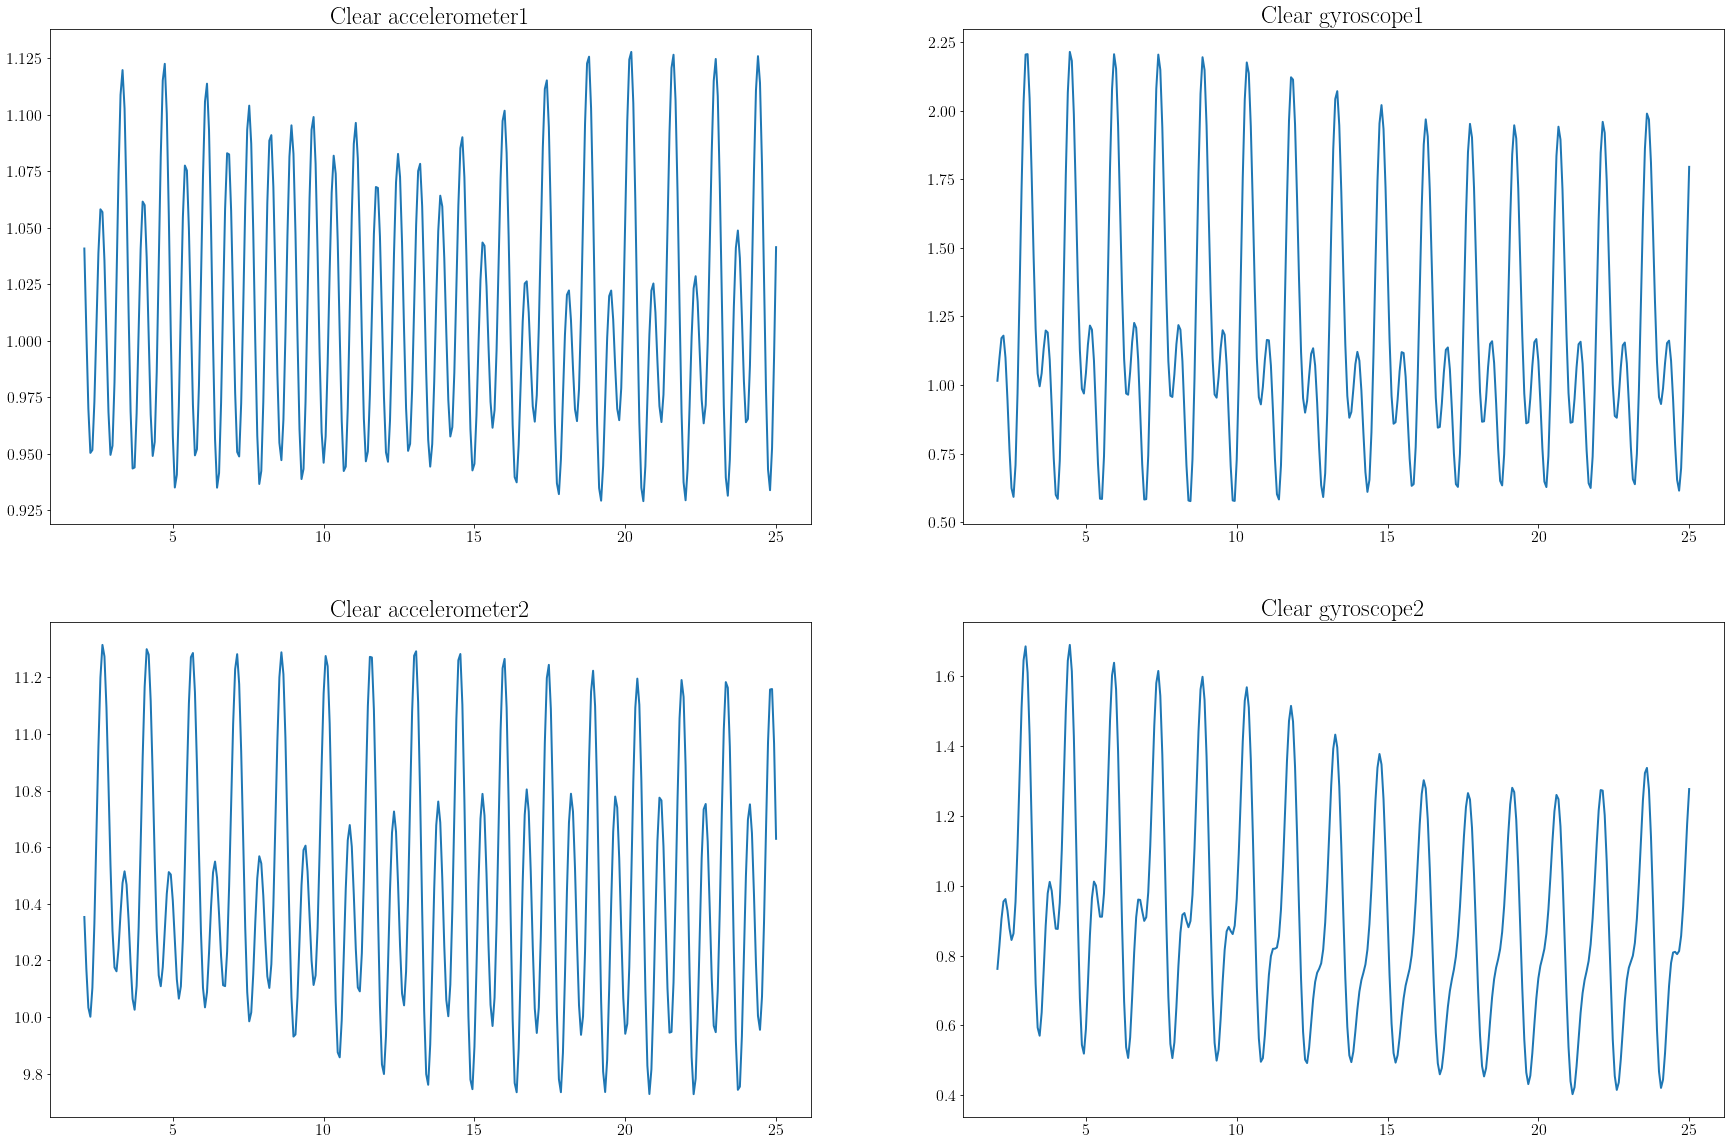

In [49]:
fig,ax = plt.subplots(2,2,figsize = (30,20))

ax[0,0].plot(a1[:,0],a1_acc_clear)
ax[0,0].title.set_text('Clear accelerometer1')
ax[1,0].plot(a1[:,0],a2_acc_clear)
ax[1,0].title.set_text('Clear accelerometer2')
ax[0,1].plot(a1[:,0],g1_acc_clear)
ax[0,1].title.set_text('Clear gyroscope1')
ax[1,1].plot(a1[:,0],g2_acc_clear)
ax[1,1].title.set_text('Clear gyroscope2')

In [53]:
# to cut 25 segments from time series 
A1_H = HankelMatrix(a1_acc_clear,25)
A2_H = HankelMatrix(a2_acc_clear,25)
G1_H = HankelMatrix(g1_acc_clear,25)
G2_H = HankelMatrix(g2_acc_clear,25)

A1_init = HankelMatrix(a1_acc,25)
A2_init = HankelMatrix(a2_acc,25)
G1_init = HankelMatrix(g1_acc,25)
G2_init = HankelMatrix(g2_acc,25)

# PCA (3 components)

In [54]:
from sklearn.decomposition import KernelPCA, PCA
pca = PCA(n_components=3)
A2_PCA = pca.fit_transform(A2_H)

In [55]:
A2_PCA.shape

(321, 3)

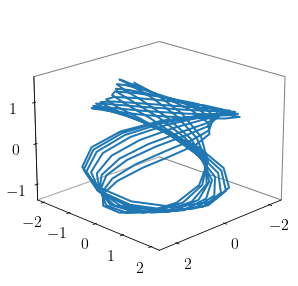

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(A2_PCA[:200,0],
        A2_PCA[:200,1],
        A2_PCA[:200,2],
        label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

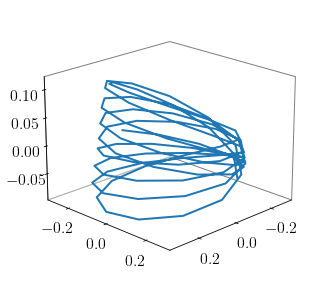

In [57]:
pca = PCA(n_components=3)
A1_PCA = pca.fit_transform(A1_H)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(A1_PCA[:100,0],
        A1_PCA[:100,1],
        A1_PCA[:100,2],
        label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

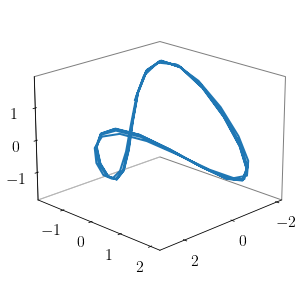

In [58]:
pca = PCA(n_components=3)
G1_PCA = pca.fit_transform(G1_H)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(G1_PCA[:100,0],
        G1_PCA[:100,1],
        G1_PCA[:100,2],
        label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

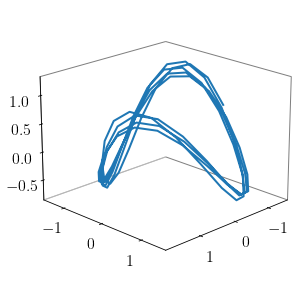

In [59]:
pca = PCA(n_components=3)
G2_PCA = pca.fit_transform(G2_H)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(G2_PCA[:100,0],
        G2_PCA[:100,1],
        G2_PCA[:100,2],
        label='parametric curve')

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#ax.set_zlim(contourz,X_PCA[:,2].max()*1.1)
ax.view_init(elev=20, azim=45)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# PCA (2 components)

In [60]:
AG1,AG2 = np.concatenate((A1_H,G1_H),axis=1),np.concatenate((A2_H,G2_H),axis=1)

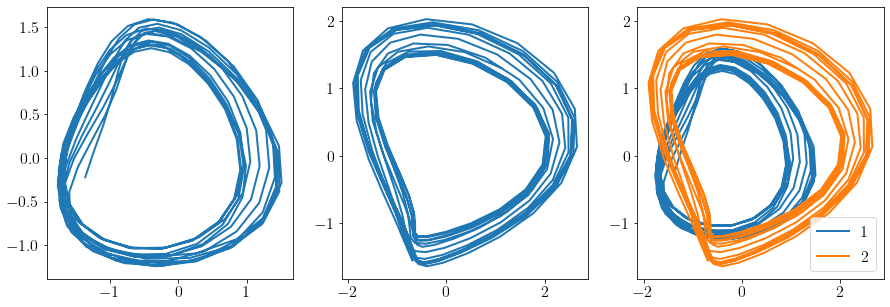

In [61]:
pca = PCA(n_components=2)
AG1_PCA = pca.fit_transform(AG1,AG2)
AG2_PCA = pca.transform(AG2)
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(AG2_PCA[:,0],AG2_PCA[:,1])
ax[1].plot(AG1_PCA[:,0],AG1_PCA[:,1])
ax[2].plot(AG2_PCA[:,0],AG2_PCA[:,1],label='1')
ax[2].plot(AG1_PCA[:,0],AG1_PCA[:,1],label='2')
ax[2].legend()

# PLS (2 components)

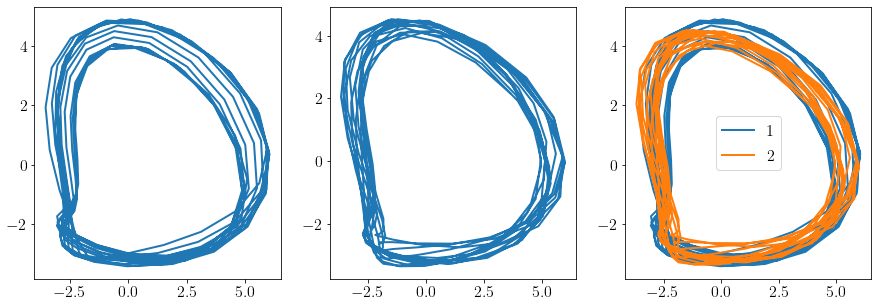

In [62]:
from sklearn.cross_decomposition import PLSRegression 

PLS = PLSRegression(n_components = 2)
PLS.fit(AG1,AG2)
AG1_PLS,AG2_PLS = PLS.x_scores_, PLS.y_scores_
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(AG2_PLS[:,0],AG2_PLS[:,1])
ax[1].plot(AG1_PLS[:,0],AG1_PLS[:,1])
ax[2].plot(AG2_PLS[:,0],AG2_PLS[:,1],label='1')
ax[2].plot(AG1_PLS[:,0],AG1_PLS[:,1],label='2')
ax[2].legend()

In [63]:
PLS.x_rotations_[15:,0].argmax(), PLS.y_rotations_[15:,0].argmax()

(11, 32)

In [64]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(AG1_PLS, AG2_PLS)
reg.coef_

array([[1.00000000e+00, 7.66781665e-02],
       [8.32035405e-18, 1.00000000e+00]])

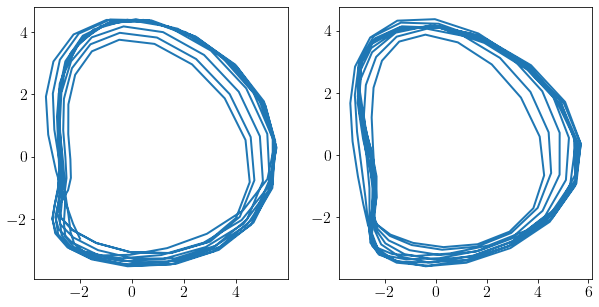

In [65]:
PLS = PLSRegression(n_components = 2)
PLS.fit(AG1[:220,:],AG2[:220,:])
AG1_PLS,AG2_PLS = PLS.x_scores_, PLS.y_scores_
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(AG2_PLS[:,0],AG2_PLS[:,1])
ax[1].plot(AG1_PLS[:,0],AG1_PLS[:,1])

W: [[1.        0.0588289]
 [0.        1.       ]]
MSE train: 0.05683399377718485


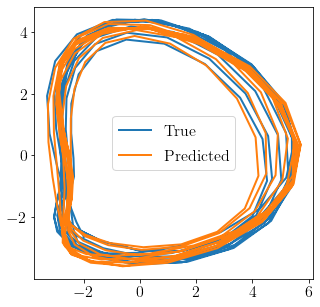

In [67]:
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(AG1_PLS, AG2_PLS)
print('W:',reg.coef_)
print('MSE train:', mean_squared_error(reg.predict(AG1_PLS),AG2_PLS))
plt.plot(AG2_PLS[:,0],AG2_PLS[:,1],label='True')
plt.plot(reg.predict(AG1_PLS)[:,0],reg.predict(AG1_PLS)[:,1],label='Predicted')
plt.legend()

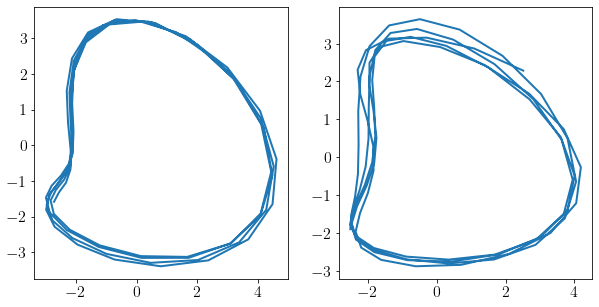

In [68]:
AG1_PLS_test,AG2_PLS_test = PLS.transform(AG1[220:,:],AG2[220:,:])
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(AG2_PLS_test[:,0],AG2_PLS_test[:,1])
ax[1].plot(AG1_PLS_test[:,0],AG1_PLS_test[:,1])

0.12716608499187174


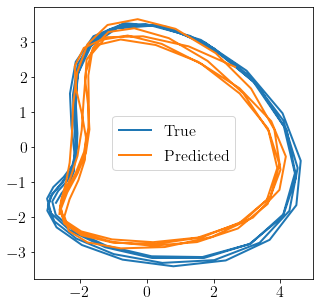

In [69]:
print(mean_squared_error(reg.predict(AG1_PLS_test),AG2_PLS_test))
plt.plot(AG2_PLS_test[:,0],AG2_PLS_test[:,1],label='True')
plt.plot(reg.predict(AG1_PLS_test)[:,0],reg.predict(AG1_PLS_test)[:,1],label='Predicted')
plt.legend()

Lets plot matrices $P^{50x2}$ and $Q^{50x2}$ for PLS method. 

Text(0.5, 1.0, 'Q')

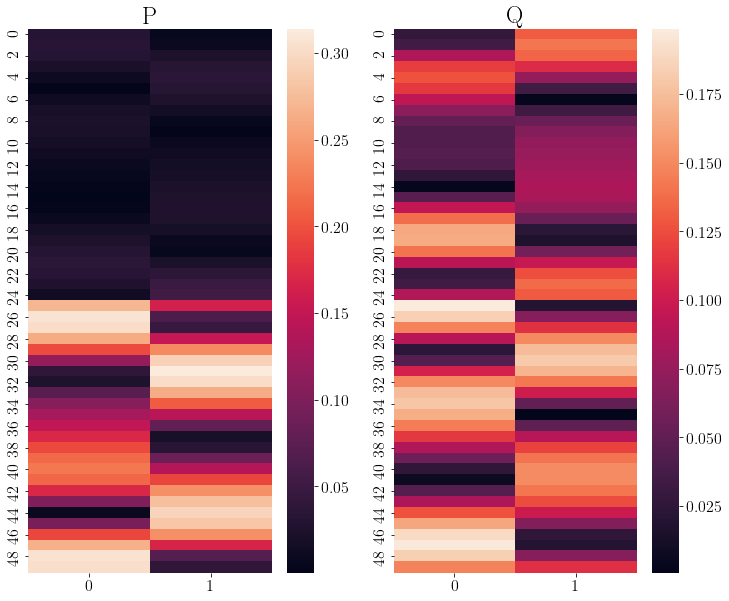

In [102]:
import seaborn as sns
# P,Q 
fig,ax = plt.subplots(1,2,figsize=(12,10))
sns.heatmap(abs(PLS.x_rotations_),ax = ax[0])
sns.heatmap(abs(PLS.y_rotations_),ax = ax[1])
ax[0].set_title('P')
ax[1].set_title('Q')

# QPFS

In [71]:
def get_corr_matrix(X, Y=None, fill=0):
    if Y is None:
        Y = X
    if len(Y.shape) == 1:
        Y = Y[:, np.newaxis]
    if len(X.shape) == 1:
        X = X[:, np.newaxis]
    
    X_ = (X - X.mean(axis=0))
    Y_ = (Y - Y.mean(axis=0))
    
    idxs_nz_x = np.where(np.sum(X_ ** 2, axis = 0) != 0)[0]
    idxs_nz_y = np.where(np.sum(Y_ ** 2, axis = 0) != 0)[0]
    
    X_ = X_[:, idxs_nz_x]
    Y_ = Y_[:, idxs_nz_y]
    
    corr = np.ones((X.shape[1], Y.shape[1])) * fill
    
    for i, x in enumerate(X_.T):
        corr[idxs_nz_x[i], idxs_nz_y] = Y_.T.dot(x) / np.sqrt(np.sum(x ** 2) * np.sum(Y_ ** 2, axis=0, keepdims=True))
    return corr

[Text(0, 12.5, 'Ac2'), Text(0, 37.5, 'Gyro2')]

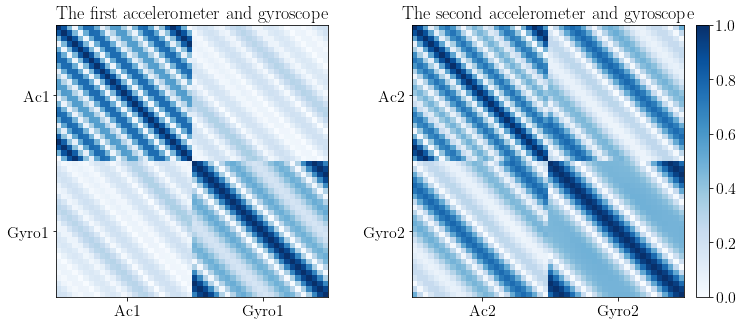

In [101]:
x_label_list = ['Ac2', 'Gyro2']
y_label_list = ['Ac1', 'Gyro1']

fig, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0].imshow(np.abs(get_corr_matrix(AG1[:,:])), vmin=0., vmax=1., cmap='Blues')
ax[0].set_title('The first accelerometer and gyroscope',size=18)
ax[0].set_xticks([12.5,37.5])
ax[0].set_yticks([12.5,37.5])
ax[0].set_xticklabels(y_label_list)
ax[0].set_yticklabels(y_label_list)
ax[1].imshow(np.abs(get_corr_matrix(AG2[:,:])), vmin=0., vmax=1., cmap='Blues')
fig.colorbar(img,fraction=0.046, pad=0.04)
ax[1].set_title('The second accelerometer and gyroscope',size=18)
ax[1].set_xticks([12.5,37.5])
ax[1].set_yticks([12.5,37.5])
ax[1].set_xticklabels(x_label_list)
ax[1].set_yticklabels(x_label_list)

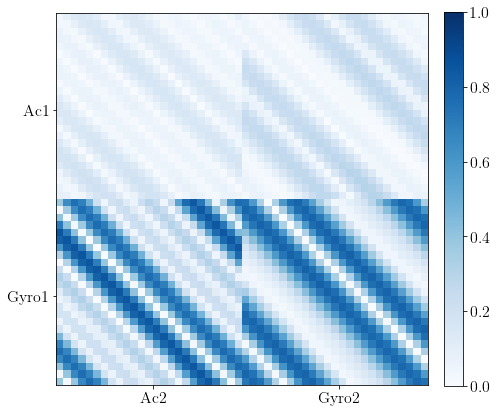

In [94]:
fig, ax = plt.subplots(1,1,figsize=(7,7))

img = ax.imshow(np.abs(get_corr_matrix(AG1,AG2)), vmin=0., vmax=1., cmap='Blues')
x_label_list = ['Ac2', 'Gyro2']
y_label_list = ['Ac1', 'Gyro1']

ax.set_xticks([12.5,37.5])
ax.set_yticks([12.5,37.5])

ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)

fig.colorbar(img,fraction=0.046, pad=0.04)
fig.tight_layout()